# Heart disease analysis 

In [87]:
import pandas as pd

Hdisease = pd.read_csv("heart.csv")
print(Hdisease.isnull().sum()) #No missing values. 

print(Hdisease.shape)

Hdisease['target'].value_counts() #dataset is reasonably balanced
pd.DataFrame(Hdisease.target.value_counts(normalize = True)) #confirms that class 0 has 45% and class 1 has 54% of data



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(303, 14)


,target
1,0.544554
0,0.455446


# Visualizing the categorical variables 

## Starting with sex and heart disease (target)

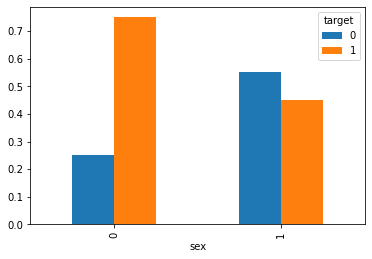

In [88]:
import matplotlib.pyplot as plt

sex = Hdisease.groupby("sex").target.value_counts(normalize = True) 
sex = sex.unstack() #cleans up dataframe
sex
sex.plot(kind = 'bar') # A big proportion of women had heart disease compared to not having it.
                       # For men, it was around 50/50 of having/not having heart disease.



## Visualizing chest pain and heart disease 

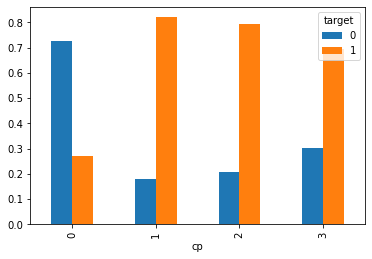

In [90]:
#4 values in chest pain, e.g 0 is mild and 3 is very severe.

chest_pain = Hdisease.groupby("cp").target.value_counts(normalize = True) 
chest_pain = chest_pain.unstack() 
chest_pain
chest_pain.plot(kind = 'bar')  


## Visualizing fasting blood sugar and heart disease 

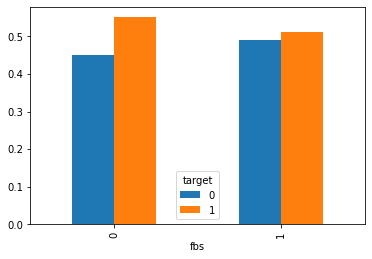

In [8]:
fast_blood = Hdisease.groupby('fbs').target.value_counts(normalize = True)
fast_blood = fast_blood.unstack()
fast_blood.plot(kind = 'bar')

## Visualizing resting electrocardiographic results and heart disease

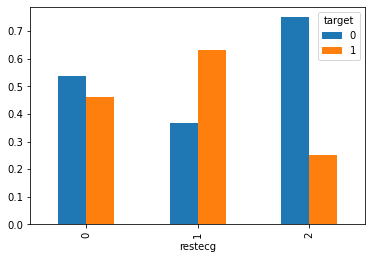

In [9]:
Electro = Hdisease.groupby('restecg').target.value_counts(normalize = True)
Electro = Electro.unstack()
Electro.plot(kind = 'bar') #considering restingecg most severe class had a lot more people not having heart disease. this variable will not be included further.

## Visualizing exercised induced angina and heart disease

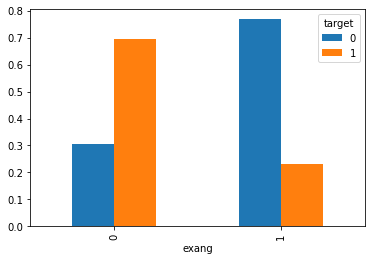

In [10]:
angina = Hdisease.groupby('exang').target.value_counts(normalize = True)
angina = angina.unstack()
angina.plot(kind = 'bar')


## Visualizing slope of peak exercise ST segment and target

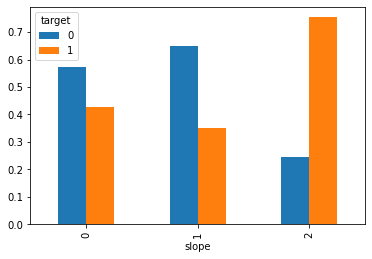

In [11]:
slope = Hdisease.groupby('slope').target.value_counts(normalize = True)
slope = slope.unstack()
slope.plot(kind = 'bar')  

## Visualizing number of major vessels coloured by fluoroscopy and target

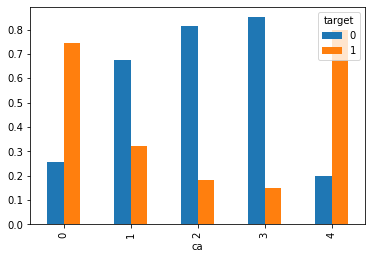

In [12]:
fluoro = Hdisease.groupby('ca').target.value_counts(normalize = True)
fluoro = fluoro.unstack()
fluoro.plot(kind = 'bar')

# Visualizing the continuous variables

## Visualizing age and target

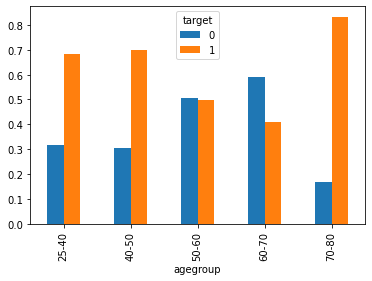

In [13]:
#creating new column from age called agegroup so we can get bins of 5 different categories for visualization. 
#this is feature engineering: labels need to be one fewer than bins. Can do this for each continuous variable.
#Note: good to check min and max value before doing this to make sure I put the correct ranges in or else if not
#could result in na's for some rows

Hdisease['agegroup']= pd.cut(Hdisease.age,[25,40,50,60,70,80], labels = ['25-40', '40-50', '50-60', '60-70', '70-80'])

Hdisease.head(n=30)

age_group = Hdisease.groupby('agegroup').target.value_counts(normalize = True)
age_group= age_group.unstack()
age_group.plot(kind = 'bar')

#Note: people between 25 and 50 tend to have heart disease a lot more than people who don't.
#around 50/50 for 50-60 and betwen 60-70 more people don't have heart disease.
#Between 70-80 it is the most pronounced with the majority having heart disease.

                                                                

## Visualizing resting blood pressure and the target

94
200


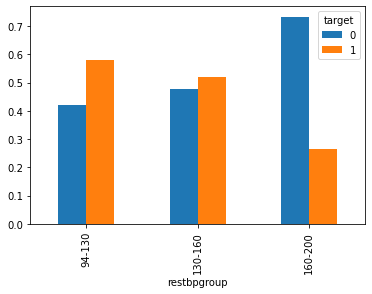

In [14]:
print(Hdisease['trestbps'].min())
print(Hdisease['trestbps'].max())

Hdisease['restbpgroup']= pd.cut(Hdisease.trestbps,[94,130,160,200], labels = ['94-130', '130-160', '160-200'])

Hdisease.head(n=30)

restbp_group = Hdisease.groupby('restbpgroup').target.value_counts(normalize = True)
restbp_group= restbp_group.unstack()
restbp_group.plot(kind = 'bar')

#Will not include in machine learning later on.



## Visualizing cholestorol and heart disease

126
564


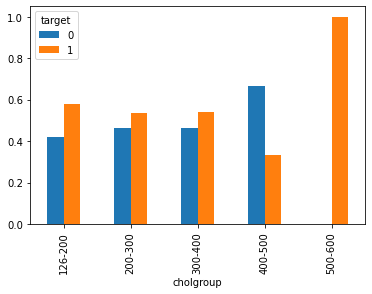

In [17]:
print(Hdisease['chol'].min())
print(Hdisease['chol'].max())

Hdisease['cholgroup']= pd.cut(Hdisease.chol,[126,200,300,400,500,600], labels = ['126-200', '200-300', '300-400', '400-500', '500-600'])

Hdisease.head(n=30)

chol_group = Hdisease.groupby('cholgroup').target.value_counts(normalize = True)
chol_group= chol_group.unstack()
chol_group.plot(kind = 'bar')


## Visualizing oldpeak and heart disease

0.0
6.2


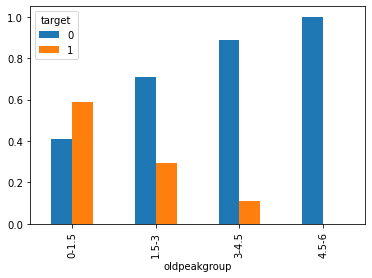

In [24]:
print(Hdisease['oldpeak'].min())
print(Hdisease.oldpeak.max())

Hdisease['oldpeakgroup']= pd.cut(Hdisease.oldpeak,[0,1.5,3,4.5,6], labels = ['0-1.5', '1.5-3', '3-4.5', '4.5-6'])

Oldpeak_Group = Hdisease.groupby('oldpeakgroup').target.value_counts(normalize = True)
Oldpeak_Group = Oldpeak_Group.unstack()
Oldpeak_Group.plot(kind = 'bar')
                                                                        
                                                                        


## Visualizng maximum heart rate acheived and target

71
202


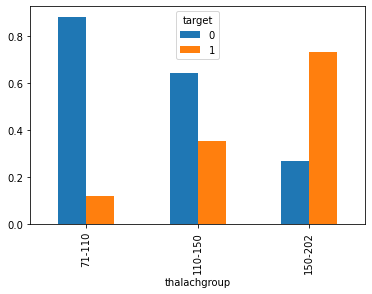

In [30]:
print(Hdisease['thalach'].min())
print(Hdisease.thalach.max())

Hdisease['thalachgroup']= pd.cut(Hdisease.thalach,[71,110,150,202], labels = ['71-110', '110-150', '150-202'])

Thalach_Group = Hdisease.groupby('thalachgroup').target.value_counts(normalize = True)
Thalach_Group = Thalach_Group.unstack()
Thalach_Group.plot(kind = 'bar')

# Setting up the feature matrix and target array

In [32]:
X = Hdisease[['age', 'sex', 'cp', 'chol', 'thalach', 'oldpeak', 'slope','ca']].values
y = Hdisease['target'].values

# Random forest with Sklearn 

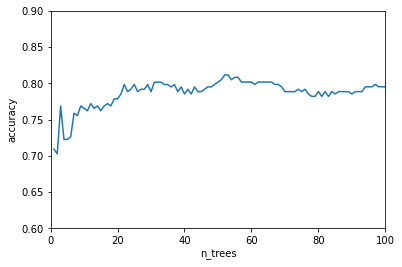

RandomForestClassifier(n_estimators=25, random_state=112)

In [85]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#Using elbow graph to determine optimal value of trees to build

n_est = np.array(range(1,101))


paramGrid = { 'n_estimators':n_est,}

Rforest = RandomForestClassifier(random_state = 111)
Grid = GridSearchCV(Rforest, paramGrid, cv=5)
Grid.fit(X,y)

scores = Grid.cv_results_['mean_test_score']
plt.plot(n_est, scores)
plt.xlabel('n_trees')
plt.ylabel('accuracy')
plt.xlim(0,100)
plt.ylim(0.6,0.9)
plt.show()

#around 25 trees is when it starts to level out. We will choose to build with 25 trees

RForest = RandomForestClassifier(n_estimators = 25, random_state =112)
RForest.fit(X,y)





## Feature importances 

In [73]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state = 113)

#Fitting the model

Rf = RandomForestClassifier(n_estimators = 25, random_state = 114)
Rf.fit(X_train, y_train)
print(Rf.score(X_test, y_test)) #80%

feature_imp = pd.Series(Rf.feature_importances_, index = \
['age', 'sex', 'cp', 'chol', 'thalach','oldpeak', 'slope', 'ca']).sort_values(ascending = False)

print(feature_imp.head(n=10))




0.8026315789473685
ca         0.190257
thalach    0.166730
age        0.143593
cp         0.136391
chol       0.120724
oldpeak    0.107783
slope      0.089874
sex        0.044648
dtype: float64


# New model excluding sex and slope 

In [84]:
New_mod = Hdisease[['ca', 'thalach', 'age', 'cp', 'chol', 'oldpeak']].values

X_train, X_test, y_train, y_test = train_test_split(New_mod, y, random_state =333)

Rf.fit(X_train, y_train)
Rf.score(X_test, y_test)

#the new model had greater accuracy 84% with sex and slope removed. 


0.8421052631578947